This challenge attempts to  compare KNN Regression and OLS Regression. I am using the real state valuation dataset  to predict the price of house per unit area

In [5]:
# dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [6]:
data = pd.read_excel('Real estate valuation data set.xlsx')

In [7]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [16]:
# let's 'create our features & target variables
# our target is Balance, features are everything else

features = data[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude','X6 longitude' ]]
target = data['Y house price of unit area']

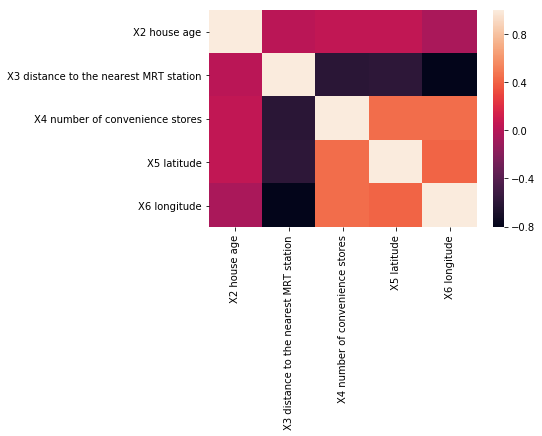

In [18]:
# Coorealtion among the existing features
sns.heatmap(features.corr())

In [21]:
#Create train test split
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.25, random_state = 20)

Create KNN Model

In [24]:
knn = KNeighborsRegressor(n_neighbors = 9, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='distance')

Create OLS regression model

In [25]:
lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
#Validating the models against each other
knn_score = cross_val_score(knn, X_test, y_test, cv=5)
lm_score = cross_val_score(lm, X_test, y_test, cv=5)

print('KNN had accuracy score of : %0.2f(+/-%0.2f)'% (knn_score.mean(), knn_score.std()*2))
print('Linear Regression has accuracy score of: %0.2f(+/-%0.2f)'% (lm_score.mean(), lm_score.std()*2))

KNN had accuracy score of : 0.58(+/-0.12)
Linear Regression has accuracy score of: 0.59(+/-0.17)


In [ ]:
We can see both the models have similar accuracy. 

We might be able to aide our accuracy by normalizing the values in the KNN. This is important due to the distance measurement. For this, let's use z-score normalization.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler().fit(data)

C:\Users\18644\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [33]:
scaled_values = scaler.fit_transform(data)

scaled_data = pd.DataFrame(scaled_values, columns=data.columns)

C:\Users\18644\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
scaled_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-1.727872,-0.824722,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,-1.719505,-0.824722,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,-1.711137,1.542244,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,-1.702770,1.246373,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.694402,-1.120593,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732


In [36]:
#Split into feature and target
features = scaled_data[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude','X6 longitude' ]]
target = scaled_data['Y house price of unit area']

In [41]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.20, random_state = 20)

In [42]:
knn_1 = KNeighborsRegressor(n_neighbors=9, weights = 'distance')
knn_1.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='distance')

In [45]:
knn_1_score = cross_val_score(knn_1, X_test, y_test, cv=5)
lm_score = cross_val_score(lm, X_test, y_test, cv = 5)

print("KNN had accuracy score of: %0.2f (+/- %0.2f)" % (knn_1_score.mean(), knn_1_score.std() * 2))
print("Linear Regression had accuracy score of: %0.2f (+/- %0.2f)" % (lm_score.mean(), lm_score.std() * 2))

KNN had accuracy score of: 0.64 (+/- 0.19)
Linear Regression had accuracy score of: 0.62 (+/- 0.22)


Both models seem to perform well for this dataset. The normalization of dataset shows the increased accuacy of the model.